In [97]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [98]:
iteration=0

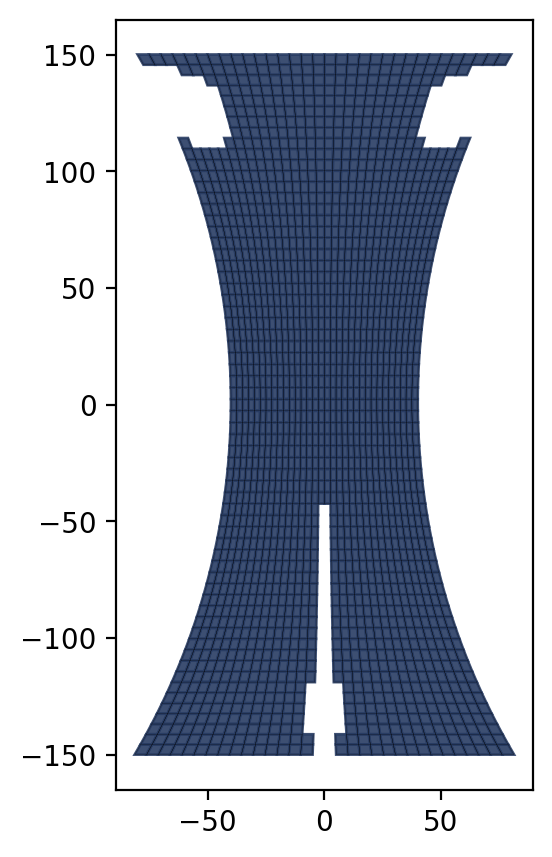

In [99]:
stress=np.loadtxt('C:\\Users\\Ashen\\Desktop\\Topology\\Demo\\Stress.txt')[:,1:]
shellstress=[]
thickness=10

for i in range(2016):
    S11a=stress[:,0+i*32]
    S22a=stress[:,1+i*32]
    S12a=stress[:,2+i*32]

    S11b=stress[:,8+i*32]
    S22b=stress[:,9+i*32]
    S12b=stress[:,10+i*32]

    S11c=stress[:,16+i*32]
    S22c=stress[:,17+i*32]
    S12c=stress[:,18+i*32]

    S11d=stress[:,24+i*32]
    S22d=stress[:,25+i*32]
    S12d=stress[:,26+i*32]

    S11=(S11a+S11b+S11c+S11d)/4
    S22=(S22a+S22b+S22c+S22d)/4
    S12=(S12a+S12b+S12c+S12d)/4
    S=np.sqrt(S11**2-S11*S22+S22**2+3*S12**2)
    shellstress.append(S[-1]/thickness)

import matplotlib.pyplot as plt
remove=np.loadtxt(f'C:\\Users\\Ashen\\Desktop\\Topology\\Case1\\{iteration}\\RemoveID.txt')
fig = plt.figure(num=1, figsize=(5, 5),dpi=200)
Element_Abaqus_Load=np.loadtxt('C:\\Users\\Ashen\\Desktop\\Topology\\Demo\\Element.txt',skiprows=0,delimiter=',')
Node_Abaqus_Load=np.loadtxt('C:\\Users\\Ashen\\Desktop\\Topology\\Demo\\Node.txt',skiprows=0,delimiter=',')
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
for Element in Element_Abaqus_Load:
    ElementTag=int(Element[0])
    Element1=int(Element[1])
    Element2=int(Element[2])
    Element3=int(Element[3])
    Element4=int(Element[4])
    Element1_Coordinate=Node_Abaqus_Load[Element1-1,[1,2]]
    Element2_Coordinate=Node_Abaqus_Load[Element2-1,[1,2]]
    Element3_Coordinate=Node_Abaqus_Load[Element3-1,[1,2]]
    Element4_Coordinate=Node_Abaqus_Load[Element4-1,[1,2]]
    Element_Coordinate=(Element1_Coordinate+Element2_Coordinate+Element3_Coordinate+Element4_Coordinate)/4
    x = [Element1_Coordinate[0],Element2_Coordinate[0],Element3_Coordinate[0],Element4_Coordinate[0]]
    y = [Element1_Coordinate[1],Element2_Coordinate[1],Element3_Coordinate[1],Element4_Coordinate[1]]
    Element_Area= PolyArea(x,y)
    if ElementTag not in remove:
        plt.fill(x,y,color="#283c63", alpha=0.9)
        plt.plot(x,y,color="k", alpha=0.9,linewidth=0.1)
ax = plt.gca()
ax.set_aspect(1)
plt.show()

In [100]:
Disp=np.loadtxt(f'C:\\Users\\Ashen\\Desktop\\Topology\\Case1\\{iteration}\\Displacement_{iteration}.txt')[:,1:]
nodearray=np.loadtxt('C:\\Users\\Ashen\\Desktop\\Topology\\Demo\\Node.txt',delimiter=',')
DeformationXY=np.array([[0,0]])

for index in range(nodearray.shape[0]):
    nodeTag=int(nodearray[index][0])
    nodeX=float(nodearray[index][1])
    nodeY=float(nodearray[index][2])

    dispX=Disp[:,0+index*3]
    dispY=Disp[:,1+index*3]

    X=nodeX+dispX
    Y=nodeY+dispY
    # plt.scatter(nodeX,nodeY,s=1,color='k',marker='x')
    # plt.scatter(X[-1],Y[-1],s=1,color='r')

    deformation_temp=np.array([[X[-1],Y[-1]]])
    DeformationXY=np.append(DeformationXY,deformation_temp,axis=0)
# ax = plt.gca()
# ax.set_aspect(1)
# plt.show()

# print(DeformationXY.shape)

In [101]:
stress=np.loadtxt(f'C:\\Users\\Ashen\\Desktop\\Topology\\Case1\\{iteration}\\Stress_{iteration}.txt')[:,1:]
shellstress=[]
thickness=10

for i in range(2016):
    S11a=stress[:,0+i*32]
    S22a=stress[:,1+i*32]
    S12a=stress[:,2+i*32]

    S11b=stress[:,8+i*32]
    S22b=stress[:,9+i*32]
    S12b=stress[:,10+i*32]

    S11c=stress[:,16+i*32]
    S22c=stress[:,17+i*32]
    S12c=stress[:,18+i*32]

    S11d=stress[:,24+i*32]
    S22d=stress[:,25+i*32]
    S12d=stress[:,26+i*32]

    S11=(S11a+S11b+S11c+S11d)/4
    S22=(S22a+S22b+S22c+S22d)/4
    S12=(S12a+S12b+S12c+S12d)/4
    S=np.sqrt(S11**2-S11*S22+S22**2+3*S12**2)
    shellstress.append(S[-1]/thickness)

234.96126169073304
[[ -78.98997     150.437509  ]
 [ -76.5520902   146.081979  ]
 [ -74.1866153   141.686151  ]
 ...
 [  76.32538213 -141.32157661]
 [  78.75126144 -145.68136335]
 [  81.25       -150.        ]]


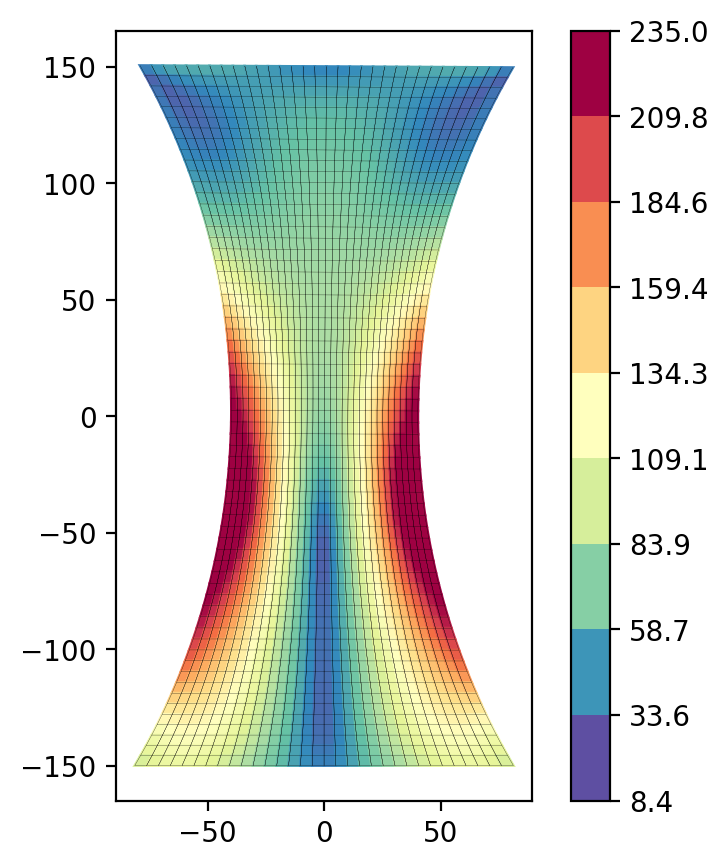

In [102]:
cmap = plt.get_cmap('Spectral_r')
shellstress_0_1=np.array(shellstress)/max(shellstress)
colors = [cmap(i) for i in shellstress_0_1]
print(max(shellstress))

fig = plt.figure(num=1, figsize=(5, 5),dpi=200)
Element_Abaqus_Load=np.loadtxt('C:\\Users\\Ashen\\Desktop\\Topology\\Demo\\Element.txt',skiprows=0,delimiter=',')
Node_Abaqus_Load=DeformationXY[1:,:]

print(Node_Abaqus_Load)

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
for index,Element in enumerate(Element_Abaqus_Load):
    color=colors[index]
    ElementTag=int(Element[0])
    Element1=int(Element[1])
    Element2=int(Element[2])
    Element3=int(Element[3])
    Element4=int(Element[4])
    Element1_Coordinate=Node_Abaqus_Load[Element1-1,[0,1]]
    Element2_Coordinate=Node_Abaqus_Load[Element2-1,[0,1]]
    Element3_Coordinate=Node_Abaqus_Load[Element3-1,[0,1]]
    Element4_Coordinate=Node_Abaqus_Load[Element4-1,[0,1]]
    Element_Coordinate=(Element1_Coordinate+Element2_Coordinate+Element3_Coordinate+Element4_Coordinate)/4
    x = [Element1_Coordinate[0],Element2_Coordinate[0],Element3_Coordinate[0],Element4_Coordinate[0]]
    y = [Element1_Coordinate[1],Element2_Coordinate[1],Element3_Coordinate[1],Element4_Coordinate[1]]
    Element_Area= PolyArea(x,y)
    if ElementTag not in remove:
        plt.fill(x,y,color=color)
        plt.plot(x,y,color="k",linewidth=0.1)

# plt.xlim(-100,100)
# plt.ylim(-150,150)
ax = plt.gca()
ax.set_aspect(1)
norm = mpl.colors.BoundaryNorm(np.linspace(min(shellstress),max(shellstress),10), cmap.N)
fcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
# plt.show()
plt.savefig(f'C:\\Users\\Ashen\\Desktop\\Topology\\Case1\\{iteration}.png', bbox_inches='tight')

[ 1901.04328  3802.0838   5703.1284   7604.1738   9505.2242  11406.2618
 13307.2816  15188.6156  16867.167   18232.319  ]


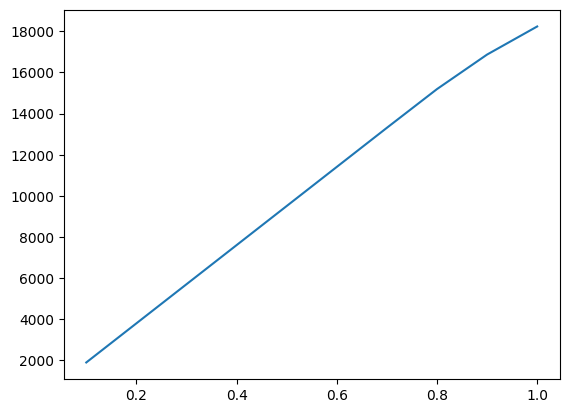

In [103]:
Top=nodearray[np.where(nodearray[:,2]==150)]
Bottom=nodearray[np.where(nodearray[:,2]==-150)]
Other=nodearray[np.where((-150<nodearray[:,2]) & (nodearray[:,2]<150))]

force=np.zeros((10,4))
for index in range(Bottom.shape[0]):
    nodeTag=int(Bottom[index][0])
    temp=np.loadtxt(f'C:\\Users\\Ashen\\Desktop\\Topology\\Case1\\{iteration}\\Reaction{nodeTag}_{iteration}.txt')
    force=force+temp

disp=np.loadtxt(f'C:\\Users\\Ashen\\Desktop\\Topology\\Case1\\{iteration}\\disp1025_{iteration}.txt')
plt.plot(disp[:,1],-force[:,1])
print(-force[:,1])

In [104]:
# import imageio
# import os
# def compose_gif():
#     img_paths = os.listdir('C:\\Users\Ashen\\Desktop\\Topology\\Case1\\images') 
#     img_paths.sort(key=lambda x:int(x.split('.')[0]))
#     gif_images = []
#     for path in img_paths:
#         path='C:\\Users\Ashen\\Desktop\\Topology\\Case1\\images\\'+path
#         gif_images.append(imageio.v3.imread(path))
#         print(path)
#     imageio.mimsave("C:/Users/Ashen/Desktop/test.gif",gif_images,fps=5,loop=0)
# compose_gif()